In [46]:
import datetime
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
import requests
import io 

In [52]:
url = "https://raw.githubusercontent.com/JaQtae/SocInfo2022/FinalProject/Data/president_polls_historical.csv"

download_poll = requests.get(url).content

poll_data = pd.read_csv(io.StringIO(download_poll.decode('utf-8')), parse_dates = ['end_date'], sep=',').set_index('end_date')

poll_data.index = poll_data.index.rename('dates')


C:\Shared\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3098: DtypeWarning: Columns (14,15,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [53]:
poll_data
#poll_data.iloc[0]


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,seat_name,election_date,stage,nationwide_batch,ranked_choice_reallocated,party,answer,candidate_id,candidate_name,pct
dates,,,,,,,,,,,,,,,,,,,,,
2020-11-03,73830,940,Lake Research,1587,National Women's Law Center,Lake Research Partners,165.0,Lake Research Partners,A/B,Live Phone,...,NaN,11/03/2020,general,False,False,DEM,Biden,13256,Joe Biden,51.0
2020-11-03,73830,940,Lake Research,1587,National Women's Law Center,Lake Research Partners,165.0,Lake Research Partners,A/B,Live Phone,...,NaN,11/03/2020,general,False,False,REP,Trump,13254,Donald Trump,48.0
2020-11-02,74946,1677,The Political Matrix/The Listener Group,NaN,NaN,The Political Matrix/The Listener Group,677.0,The Political Matrix/The Listener Group,NaN,IVR,...,NaN,11/03/2020,general,False,False,DEM,Biden,13256,Joe Biden,44.2
2020-11-02,74946,1677,The Political Matrix/The Listener Group,NaN,NaN,The Political Matrix/The Listener Group,677.0,The Political Matrix/The Listener Group,NaN,IVR,...,NaN,11/03/2020,general,False,False,REP,Trump,13254,Donald Trump,48.0
2020-11-02,72621,383,PPP,NaN,NaN,Public Policy Polling,263.0,Public Policy Polling,A-,IVR/Text,...,NaN,11/03/2020,general,False,False,DEM,Biden,13256,Joe Biden,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28,57026,383,PPP,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,A-,IVR,...,NaN,11/03/2020,general,False,False,REP,Trump,13254,Donald Trump,46.0
2018-11-28,57026,383,PPP,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,A-,IVR,...,NaN,11/03/2020,general,False,False,DEM,Warren,13258,Elizabeth Warren,43.0
2018-11-28,57026,383,PPP,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,A-,IVR,...,NaN,11/03/2020,general,False,False,REP,Trump,13254,Donald Trump,49.0


In [58]:
#list(poll_data.index.values)

[numpy.datetime64('2020-11-03T00:00:00.000000000'),
 numpy.datetime64('2020-11-03T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datetime64('2020-11-02T00:00:00.000000000'),
 numpy.datet

In [60]:
poll_data = poll_data.loc[poll_data.index >= "2020-10-01"]
#com_data[com_data.index > "2020-10-01"]
#poll_data['end_date']

In [68]:
poll_data_reduced = poll_data[['candidate_name','pct']]

In [70]:
poll_data_reduced

,candidate_name,pct
dates,,
2020-11-03,Joe Biden,51.00
2020-11-03,Donald Trump,48.00
2020-11-02,Joe Biden,44.20
2020-11-02,Donald Trump,48.00
2020-11-02,Joe Biden,49.00
...,...,...
2020-10-01,Donald Trump,42.14
2020-10-01,Joe Biden,53.39
2020-10-01,Donald Trump,41.76


In [75]:
poll_data_biden = poll_data_reduced.loc[poll_data_reduced['candidate_name'] == 'Joe Biden']
poll_data_biden


,candidate_name,pct
dates,,
2020-11-03,Joe Biden,51.00
2020-11-02,Joe Biden,44.20
2020-11-02,Joe Biden,49.00
2020-11-02,Joe Biden,48.40
2020-11-02,Joe Biden,47.00
...,...,...
2020-10-01,Joe Biden,35.70
2020-10-01,Joe Biden,37.60
2020-10-01,Joe Biden,52.48


In [77]:
poll_data_biden_daily_mean = poll_data_biden['pct'].resample('D').mean()
poll_data_biden_daily_mean

dates
2020-10-01    49.186087
2020-10-02    49.266500
2020-10-03    49.007895
2020-10-04    50.734048
2020-10-05    50.588261
2020-10-06    49.183953
2020-10-07    50.428750
2020-10-08    49.456087
2020-10-09    51.870625
2020-10-10    50.304706
2020-10-11    49.764318
2020-10-12    51.365401
2020-10-13    51.046599
2020-10-14    51.377236
2020-10-15    51.541190
2020-10-16    51.955913
2020-10-17    51.946325
2020-10-18    51.746094
2020-10-19    51.441748
2020-10-20    50.657821
2020-10-21    51.459231
2020-10-22    51.436667
2020-10-23    51.704790
2020-10-24    51.881707
2020-10-25    51.288592
2020-10-26    51.052963
2020-10-27    51.120318
2020-10-28    50.717059
2020-10-29    50.887500
2020-10-30    51.827482
2020-10-31    50.119937
2020-11-01    50.863235
2020-11-02    50.838261
2020-11-03    51.000000
Freq: D, Name: pct, dtype: float64

In [82]:
np.mean(poll_data_biden.loc[poll_data_biden.index == '2020-11-01']['pct'].values)

50.863235294117636

In [73]:
poll_data_trump = poll_data_reduced.loc[poll_data_reduced['candidate_name'] == 'Donald Trump']
poll_data_trump

,candidate_name,pct
dates,,
2020-11-03,Donald Trump,48.00
2020-11-02,Donald Trump,48.00
2020-11-02,Donald Trump,48.00
2020-11-02,Donald Trump,49.20
2020-11-02,Donald Trump,48.20
...,...,...
2020-10-01,Donald Trump,46.20
2020-10-01,Donald Trump,52.00
2020-10-01,Donald Trump,42.14


In [83]:
poll_data_trump_daily_mean = poll_data_trump['pct'].resample('D').mean()
poll_data_trump_daily_mean

dates
2020-10-01    42.346957
2020-10-02    44.159000
2020-10-03    43.250588
2020-10-04    42.604048
2020-10-05    43.476087
2020-10-06    42.660000
2020-10-07    44.143750
2020-10-08    42.703913
2020-10-09    43.586875
2020-10-10    43.433529
2020-10-11    44.731591
2020-10-12    45.170809
2020-10-13    45.267279
2020-10-14    45.860569
2020-10-15    45.288730
2020-10-16    45.596174
2020-10-17    45.628034
2020-10-18    45.172344
2020-10-19    45.403287
2020-10-20    45.557877
2020-10-21    45.577923
2020-10-22    45.645854
2020-10-23    45.802941
2020-10-24    45.565528
2020-10-25    45.474789
2020-10-26    44.564815
2020-10-27    45.461656
2020-10-28    46.435098
2020-10-29    46.311875
2020-10-30    45.537194
2020-10-31    46.947785
2020-11-01    46.005098
2020-11-02    46.556087
2020-11-03    48.000000
Freq: D, Name: pct, dtype: float64

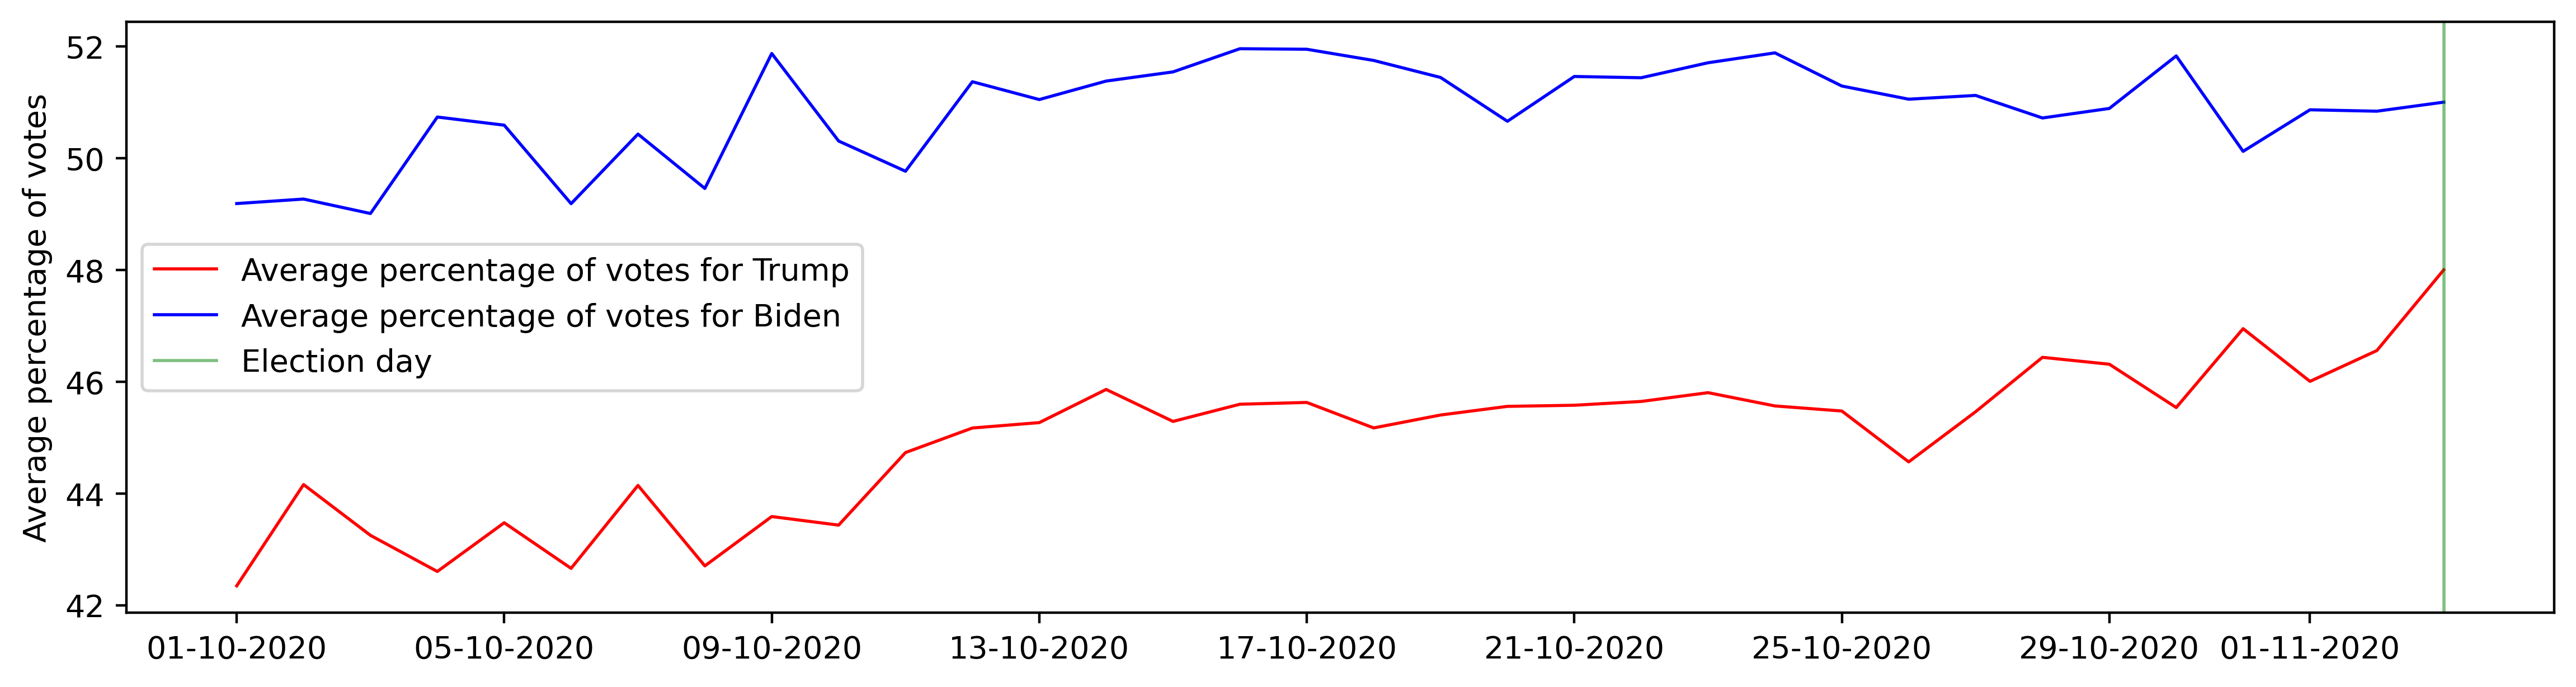

In [107]:
import matplotlib as mpl
import matplotlib.dates as mdates
#Specifying the MatPlotLib font and line width
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()
MyFmt = mdates.DateFormatter('%d-%m-%Y')
#Resample number of comments per day. 

#Convert to dataframe
poll_data_trump_daily_mean_df = pd.DataFrame(
                    {
                        'Poll pct' : poll_data_trump_daily_mean.values
                    }, index = poll_data_trump_daily_mean.index)

MA_poll_data_trump = poll_data_trump_daily_mean_df["Poll pct"].rolling('3D').mean()
#Plot the moving average on top!

poll_data_biden_daily_mean_df = pd.DataFrame(
                    {
                        'Poll pct' : poll_data_biden_daily_mean.values
                    }, index = poll_data_biden_daily_mean.index)

MA_poll_data_biden = poll_data_biden_daily_mean_df["Poll pct"].rolling('3D').mean()


#fig, ax = plt.subplots(figsize=(15,5), dpi=400)
fig, ax = plt.subplots(figsize=(14,3.5), dpi=400)
ax.plot(poll_data_trump_daily_mean.index, poll_data_trump_daily_mean.values, color = 'r', alpha=1, label="Average percentage of votes for Trump")
#ax.plot(poll_data_trump_daily_mean.index, MA_poll_data_trump.values, color='orange', label="3-day rolling average for Trump")

ax.plot(poll_data_biden_daily_mean.index, poll_data_biden_daily_mean.values, color = 'blue', alpha=1, label="Average percentage of votes for Biden")
#ax.plot(poll_data_biden_daily_mean.index, MA_poll_data_biden.values, color='k', label="3-day rolling average for Biden")


ax.axvline(x=poll_data_trump_daily_mean.index[-1], label='Election day', color='green', alpha=0.5)
#ax.plot(rolled_series.index, rolled_series.values, color='k', label="1 week rolling average")
ax.set_ylabel('Average percentage of votes')
#ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(MyFmt)
plt.savefig('polling_data.png', bbox_inches='tight')